### Load earlier merged and processed csv file that combines diffrent sheets of the excel file

In [1]:
import pandas as pd
df = pd.read_csv("Merged_df.csv")

#### Explore the dataframe

In [2]:
df.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
0,1973,210,18,106,3079.45,9.67760,44.51766667,-86.25953333,Alewife,"Frankfort, MI"
1,1973,210,27,106,423.61,14.23006,44.51158333,-86.26861667,Alewife,"Frankfort, MI"
2,1973,210,37,106,998.16,29.25219,44.48521667,-86.29936667,Alewife,"Frankfort, MI"


In [3]:
df.tail(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
36837,2018,254,82,910,1.24,0.04102,45.79633333,-86.03203333,Round goby,"Manistique, MI"
36838,2018,254,91,910,0.00,0.00000,45.7573,-86.08226667,Round goby,"Manistique, MI"
36839,2018,254,110,910,0.00,0.00000,45.70155,-86.09193333,Round goby,"Manistique, MI"


In [4]:
df.shape

(36840, 10)

In [5]:
df['depth (m)'].unique()

array([ 18,  27,  37,  46,  55,  64,  73,  82,  91, 110,   9], dtype=int64)

### Divide the dataframe into two dataframes; offshore and nearshore

In [6]:
df_nearshore = df[df['depth (m)'] <= 30]

In [7]:
df_nearshore.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
0,1973,210,18,106,3079.45,9.67760,44.51766667,-86.25953333,Alewife,"Frankfort, MI"
1,1973,210,27,106,423.61,14.23006,44.51158333,-86.26861667,Alewife,"Frankfort, MI"
10,1974,210,18,106,268.29,0.29679,44.51766667,-86.25953333,Alewife,"Frankfort, MI"


In [8]:
df_offshore = df[df['depth (m)'] > 30]

In [9]:
df_offshore.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
2,1973,210,37,106,998.16,29.25219,44.48521667,-86.29936667,Alewife,"Frankfort, MI"
3,1973,210,46,106,2862.63,113.40172,44.48383333,-86.30966667,Alewife,"Frankfort, MI"
4,1973,210,55,106,3108.58,127.66344,44.48671667,-86.31763333,Alewife,"Frankfort, MI"


### Analyze offshore dataframe

In [10]:
unique_ports = df_offshore.port.unique()
print(unique_ports)

[210 214 224 234 240 248 254]


In [11]:
df_offshore['depth (m)'].unique()

array([ 37,  46,  55,  64,  73,  82,  91, 110], dtype=int64)

In [12]:
def separate_port_wise(ports, df):
#     for ports in unique_ports:
    port_string = ports.astype('str')
    df_name = "df_nearshore_"+ port_string
    df_name = df_offshore[df_offshore.port==ports]
    return df_name    

### Frankfort-Port 210: offshore

In [13]:
unique_ports[0]

210

In [14]:
df_port_210_offshore = separate_port_wise(unique_ports[0], df = df_offshore)

In [15]:
df_port_210_offshore.shape

(4188, 10)

In [16]:
df_port_210_offshore.head(3)

,year,port,depth (m),species,#/ha,kg/ha,Lat,Long,Species Name,Port Name
2,1973,210,37,106,998.16,29.25219,44.48521667,-86.29936667,Alewife,"Frankfort, MI"
3,1973,210,46,106,2862.63,113.40172,44.48383333,-86.30966667,Alewife,"Frankfort, MI"
4,1973,210,55,106,3108.58,127.66344,44.48671667,-86.31763333,Alewife,"Frankfort, MI"


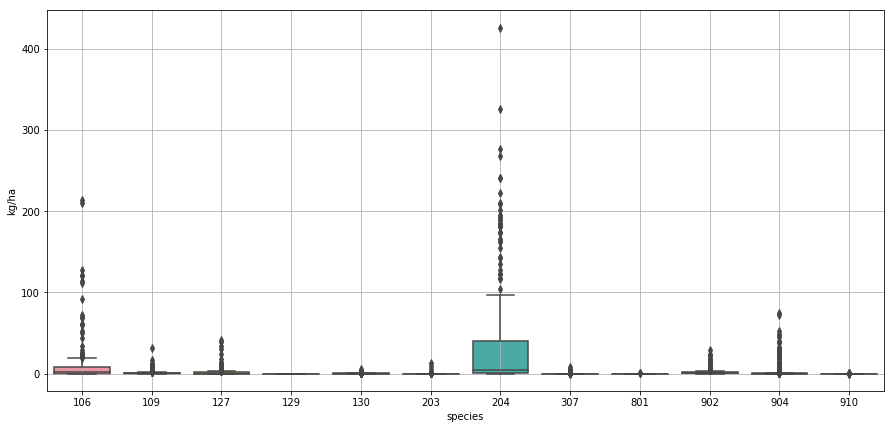

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_210_offshore, ax=ax)
plt.grid(True)
plt.show()

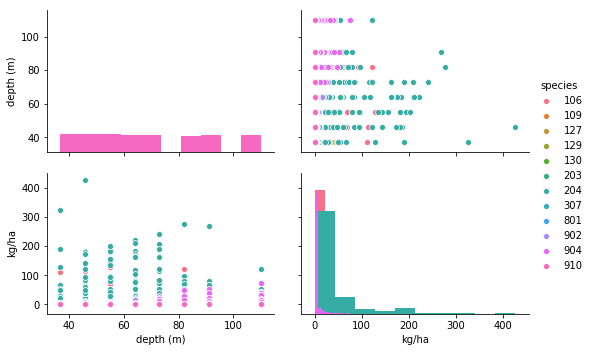

In [20]:
sns.pairplot(data = df_port_210_offshore, vars = ['depth (m)', 'kg/ha'], hue = 'species', aspect=1.5, diag_kind='hist')
# plt.grid(True)
plt.show()

In [21]:
df_port_210_offshore['depth (m)'].unique()

array([ 37,  46,  55,  64,  73,  82,  91, 110], dtype=int64)

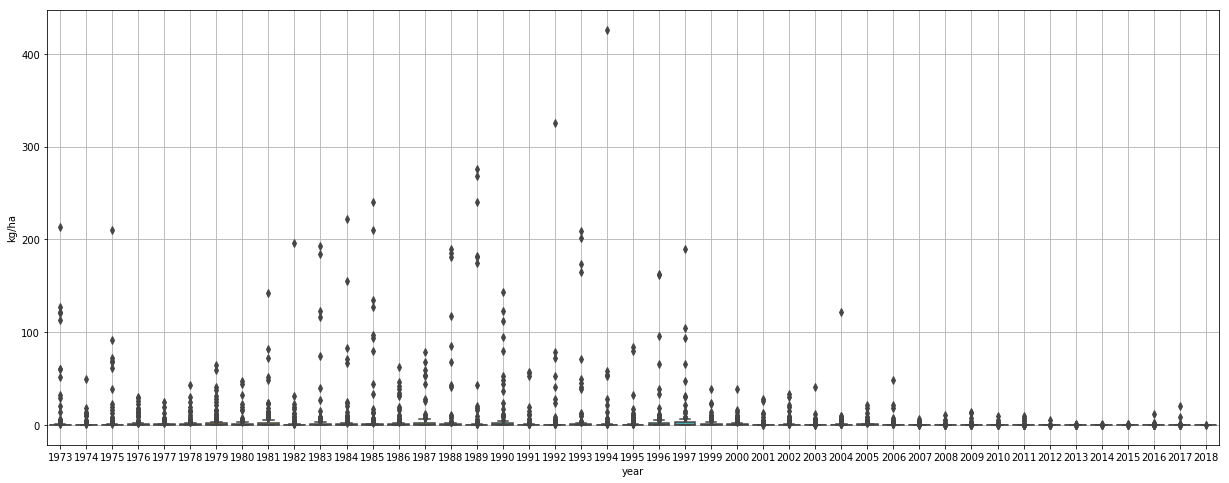

In [22]:
fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_210_offshore, ax=ax1)
plt.grid(True)
plt.show()

### If we drop outliers, for example, if we drop year-wise biomass over 25000 kg/ha, then distribution chagnes

In [23]:
df_port_210_offshore_drop_outliers = df_port_210_offshore[df_port_210_offshore['kg/ha']<=25000]

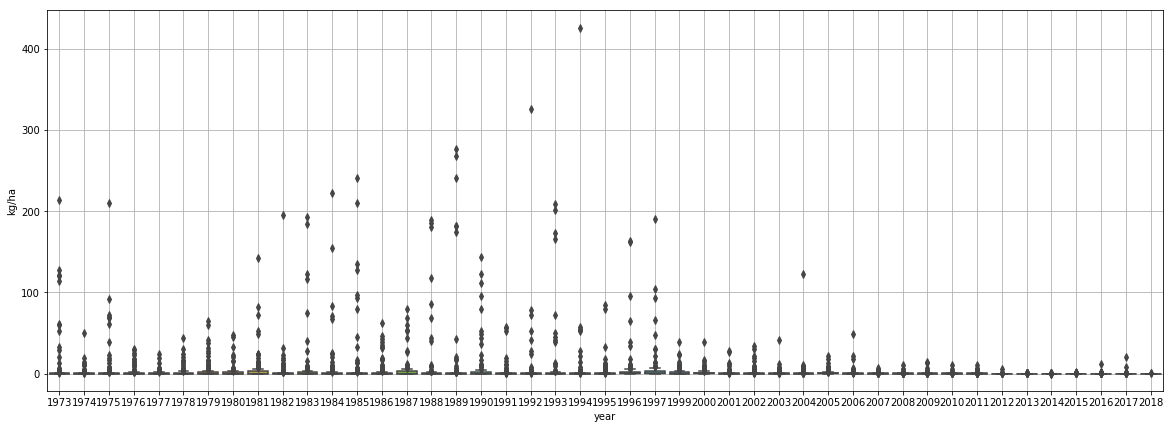

In [24]:
fig2, ax2 = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_210_offshore_drop_outliers, ax=ax2)
plt.grid(True)
plt.show()

In [25]:
total_biomass_port_210 = df_port_210_offshore.groupby('year')['kg/ha'].sum()

In [26]:
total_biomass_port_210

year
1973    1000.59954
1974     175.51372
1975     731.61053
1976     252.47101
1977     111.22819
1978     242.23661
1979     458.51894
1980     268.18188
1981     618.44358
1982     379.58412
1983     856.30705
1984     757.44896
1985    1161.61656
1986     420.35064
1987     521.64026
1988     974.77154
1989    1462.52146
1990     842.57896
1991     258.92589
1992     672.93797
1993    1059.73789
1994     749.19231
1995     297.16212
1996     669.95884
1997     687.51917
1999     218.54510
2000     175.72587
2001     130.86292
2002     187.02079
2003     113.73407
2004     187.65061
2005     121.31838
2006     141.25228
2007      34.09932
2008      30.27132
2009      48.62902
2010      29.54626
2011      32.72109
2012       6.69420
2013       2.42727
2014       1.40185
2015       3.18049
2016      17.29931
2017      32.38889
2018       0.03269
Name: kg/ha, dtype: float64

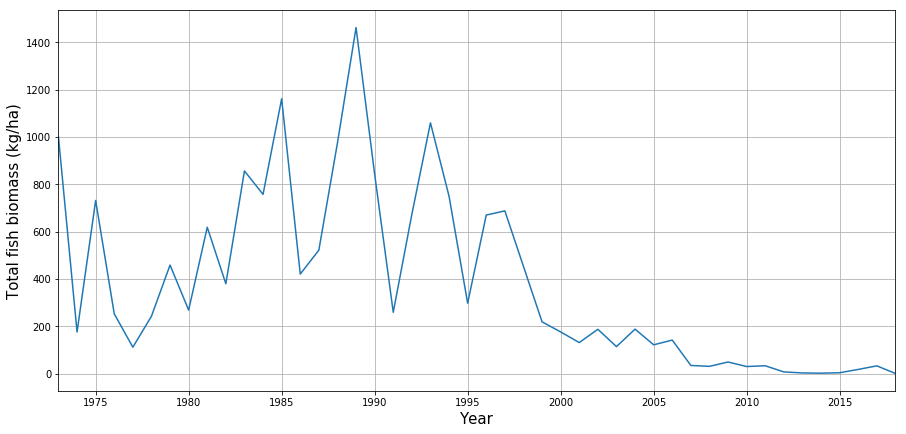

In [27]:
total_biomass_port_210.plot(figsize=(15,7))
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

In [28]:
unique_ports[1]

214

### Port 214: offshore


In [29]:
df_port_214_offshore = separate_port_wise(unique_ports[1], df = df_offshore)

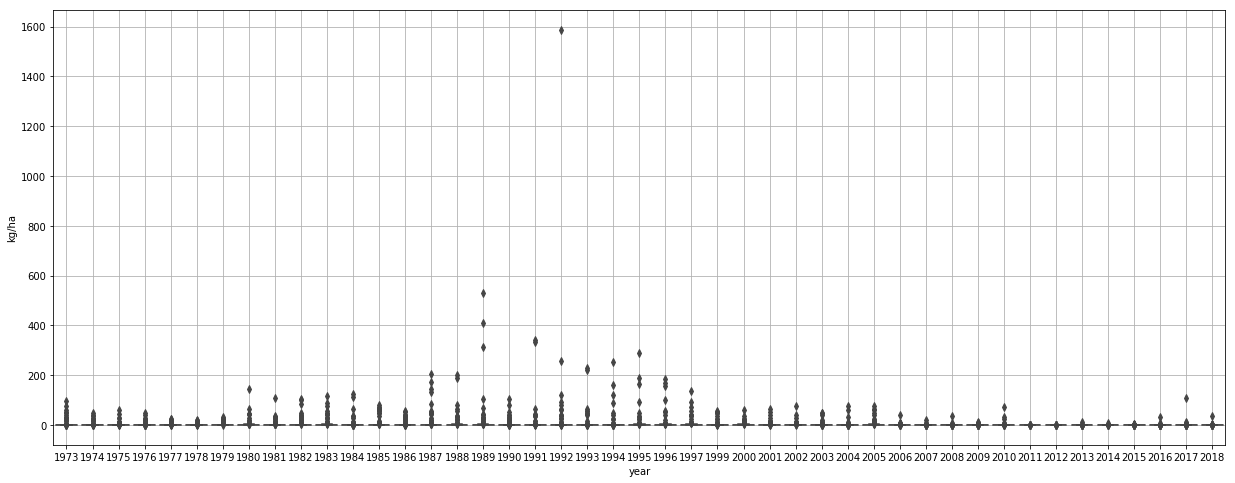

In [30]:
fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_214_offshore, ax=ax1)
plt.grid(True)
plt.show()

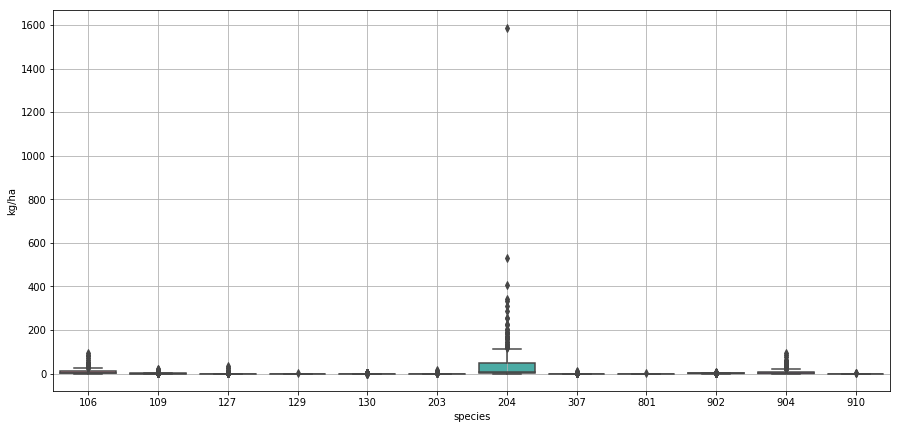

In [31]:
df_port_214_nearshore = separate_port_wise(unique_ports[1], df = df_nearshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_214_nearshore, ax=ax)
plt.grid(True)
plt.show()

In [32]:
total_biomass_port_214 = df_port_214_nearshore.groupby('year')['kg/ha'].sum()

In [33]:
total_biomass_port_214

year
1973     545.71847
1974     266.91201
1975     251.15635
1976     266.34047
1977     140.43500
1978     186.06566
1979     256.15118
1980     466.11196
1981     382.68506
1982     633.20559
1983     668.48242
1984     462.25103
1985     606.95159
1986     524.00403
1987    1108.13976
1988     837.27413
1989    1684.48640
1990     502.93767
1991     968.38197
1992    2483.30731
1993     816.92446
1994     795.64409
1995     949.78147
1996     842.39633
1997     621.70536
1999     355.34048
2000     249.54521
2001     278.39974
2002     237.79303
2003     229.04675
2004     208.03377
2005     405.25069
2006      87.89839
2007      46.26979
2008      64.93930
2009      45.14223
2010     160.28007
2011       0.71212
2012       0.90224
2013      13.81596
2014       7.47249
2015       9.28570
2016      42.09951
2017     146.49032
2018      43.01067
Name: kg/ha, dtype: float64

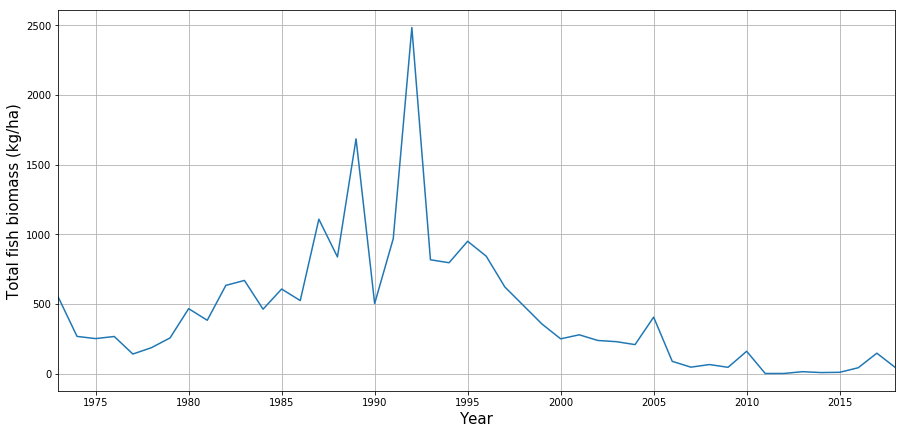

In [34]:
total_biomass_port_214.plot(figsize=(15,7))
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

### Port 224: offshore

In [35]:
unique_ports[2]

224

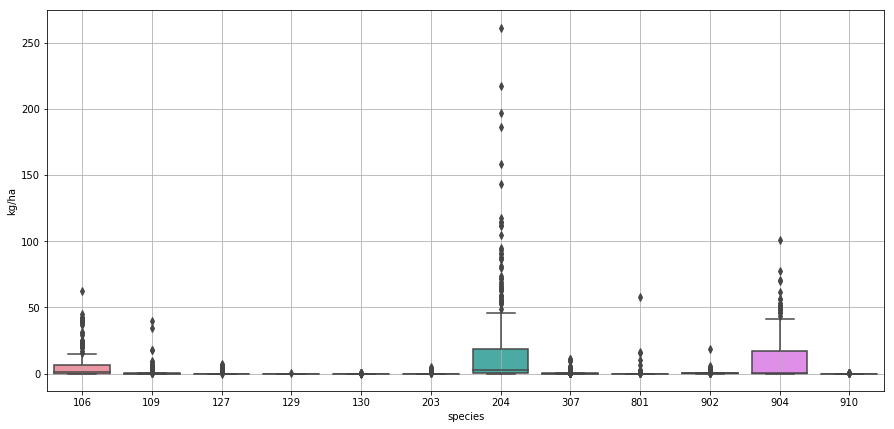

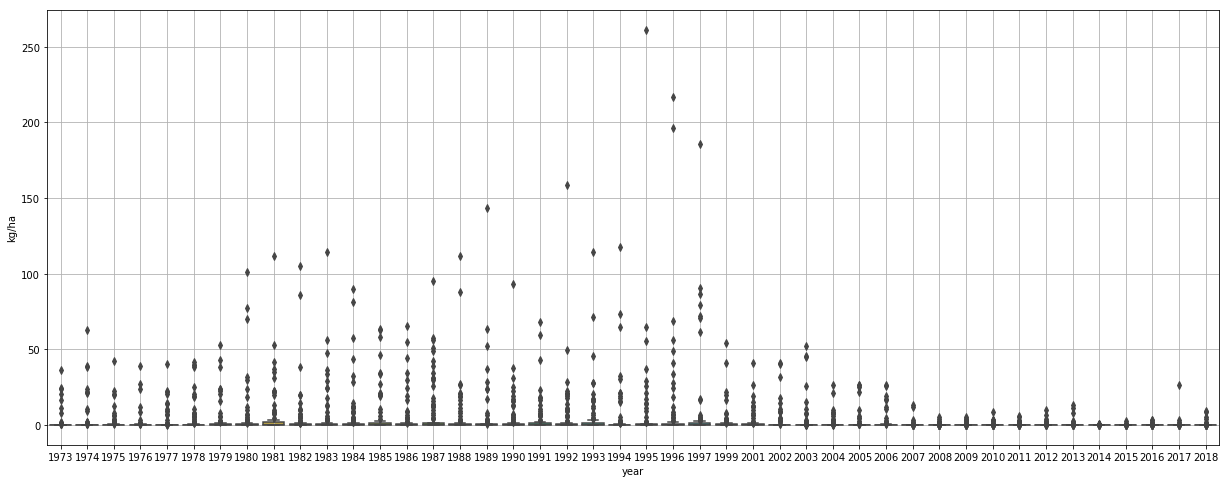

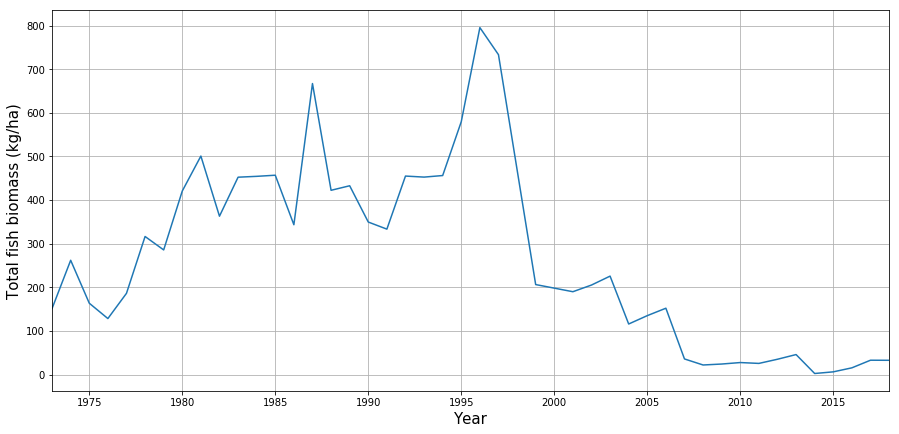

In [36]:
df_port_224_offshore = separate_port_wise(unique_ports[2], df = df_offshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_224_offshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_224_offshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_224 = df_port_224_offshore.groupby('year')['kg/ha'].sum()

total_biomass_port_224.plot(figsize=(15,7))
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)


In [37]:
unique_ports[3]

234

### Port 234: nearshore

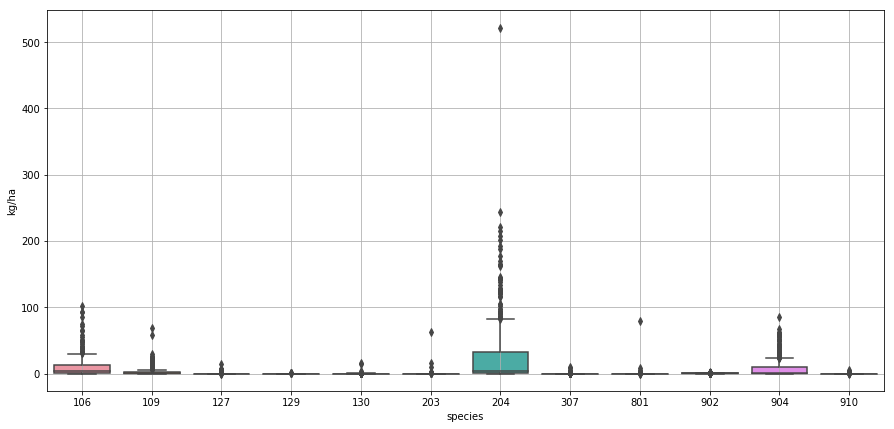

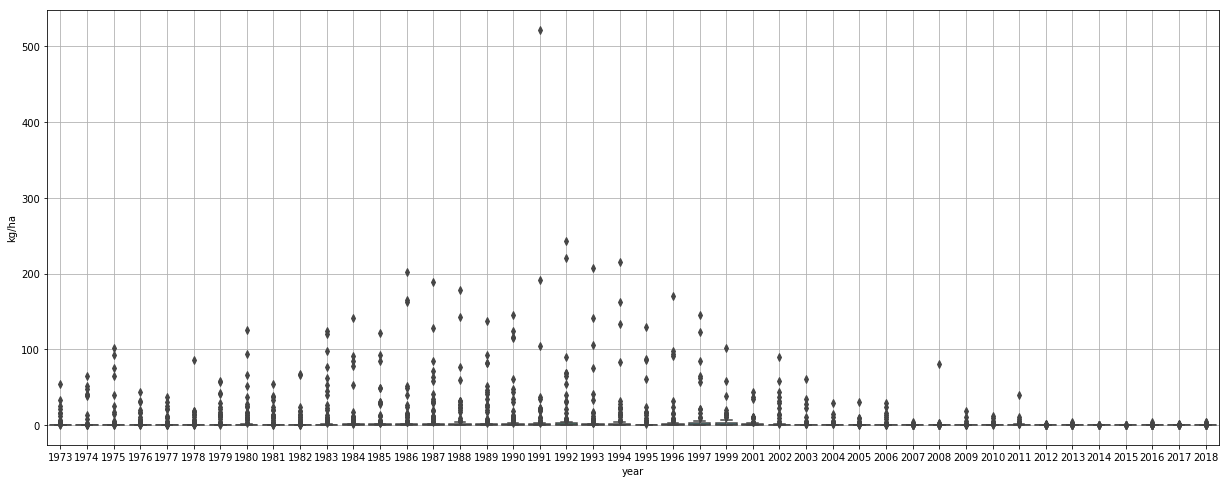

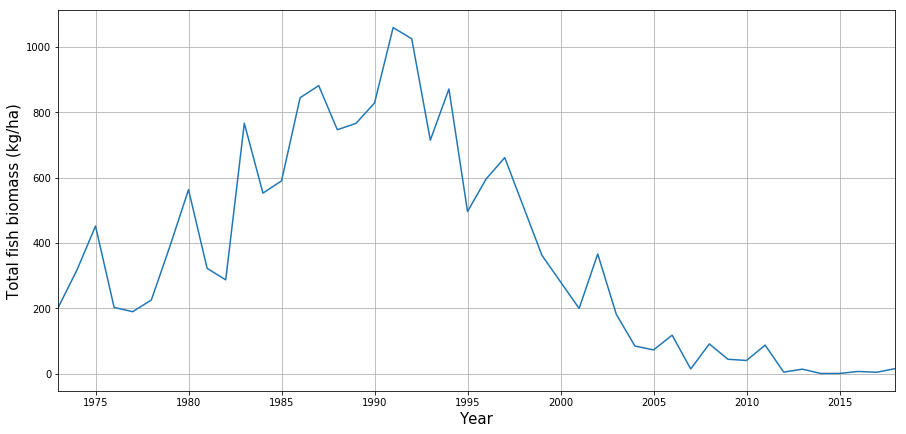

In [38]:
df_port_234_offshore = separate_port_wise(unique_ports[3], df = df_offshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_234_offshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_234_offshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_234 = df_port_234_offshore.groupby('year')['kg/ha'].sum()

total_biomass_port_234.plot(figsize=(15,7))
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)


In [39]:
unique_ports[4]

240

### Port 240: nearshore

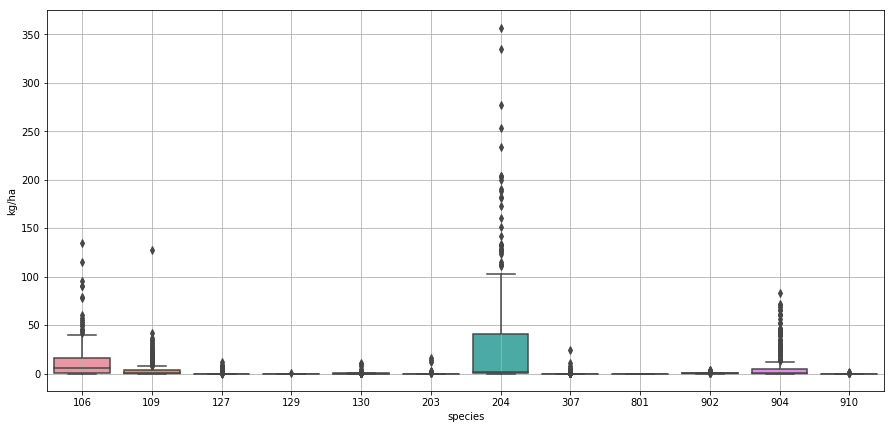

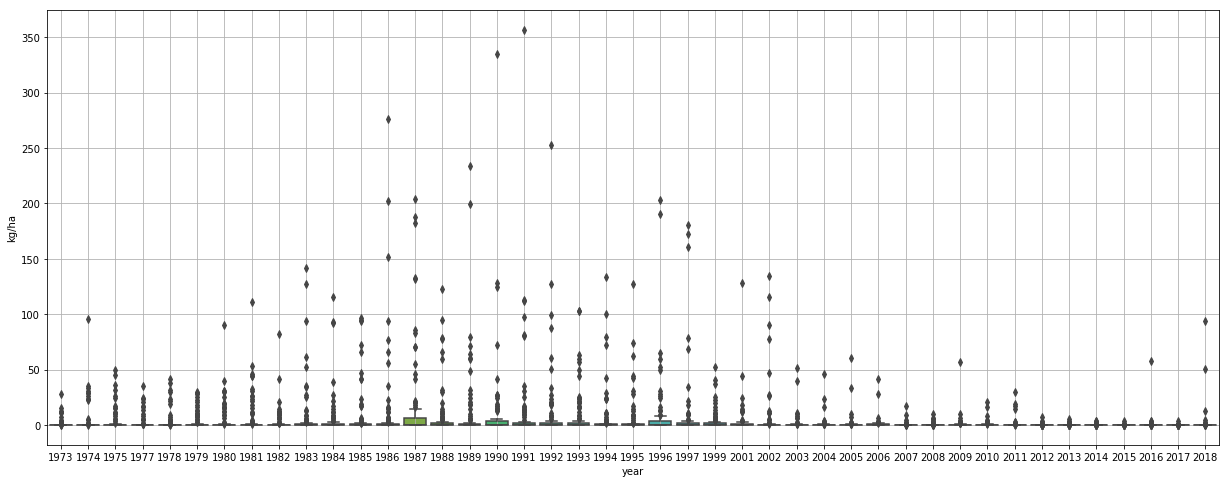

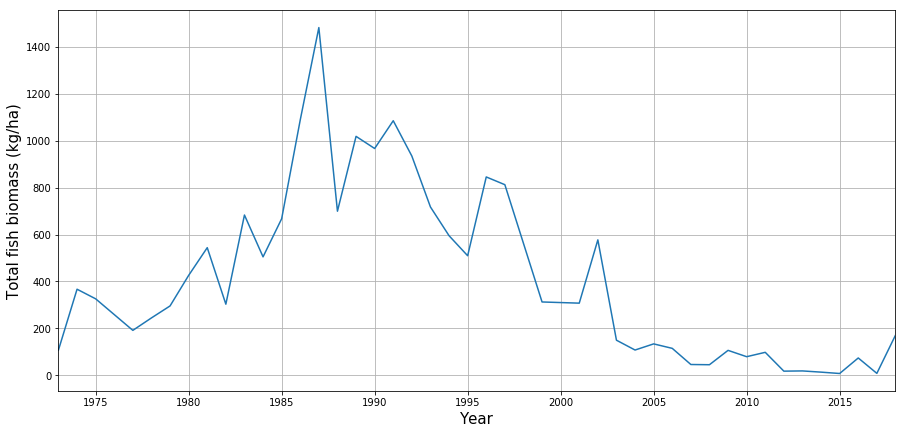

In [40]:
df_port_240_offshore = separate_port_wise(unique_ports[4], df = df_offshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_240_offshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_240_offshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_240 = df_port_240_offshore.groupby('year')['kg/ha'].sum()

total_biomass_port_240.plot(figsize=(15,7))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

In [41]:
unique_ports[5]

248

### Port 248: offshore

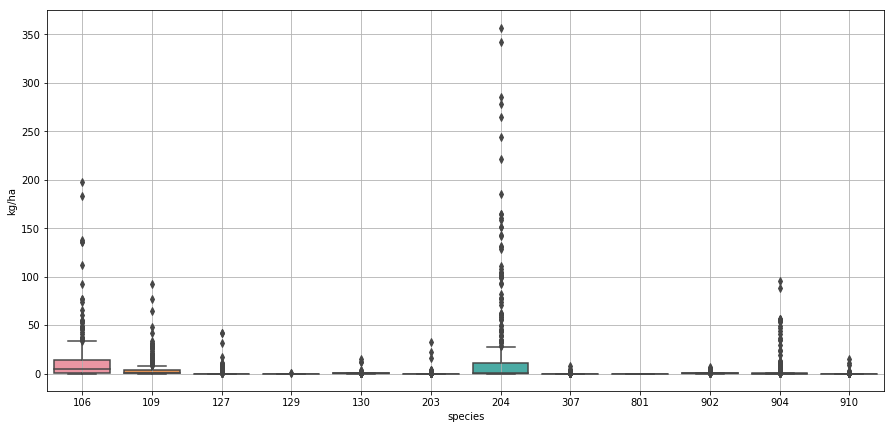

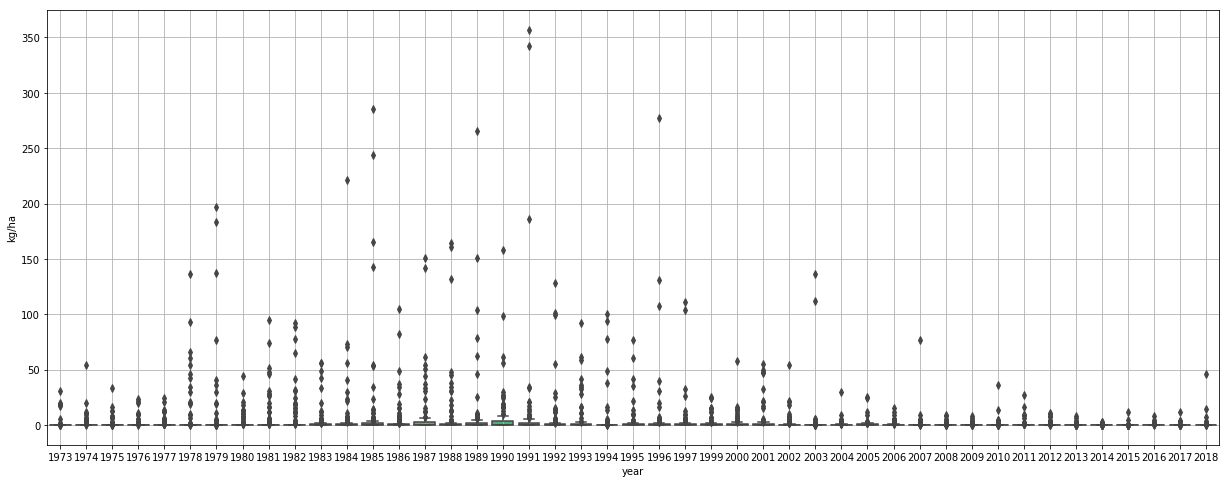

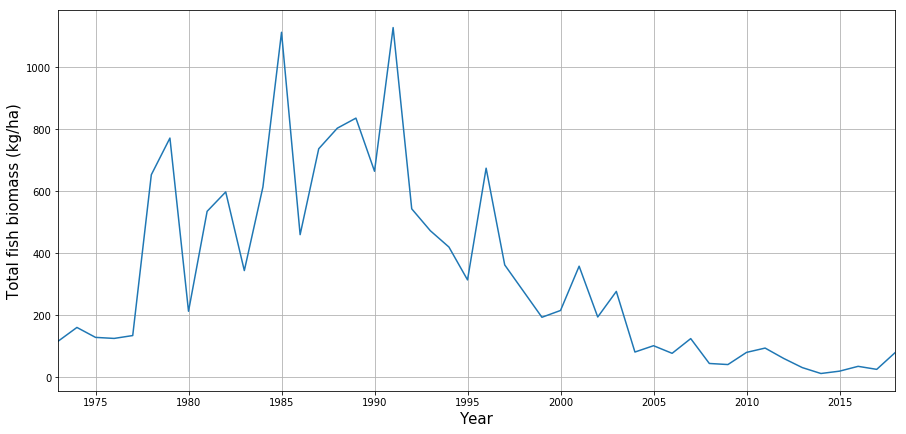

In [42]:
df_port_248_offshore = separate_port_wise(unique_ports[5], df = df_offshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_248_offshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_248_offshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_248 = df_port_248_offshore.groupby('year')['kg/ha'].sum()

total_biomass_port_248.plot(figsize=(15,7))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

In [43]:
unique_ports[6]

254

### Port: 254: offshore

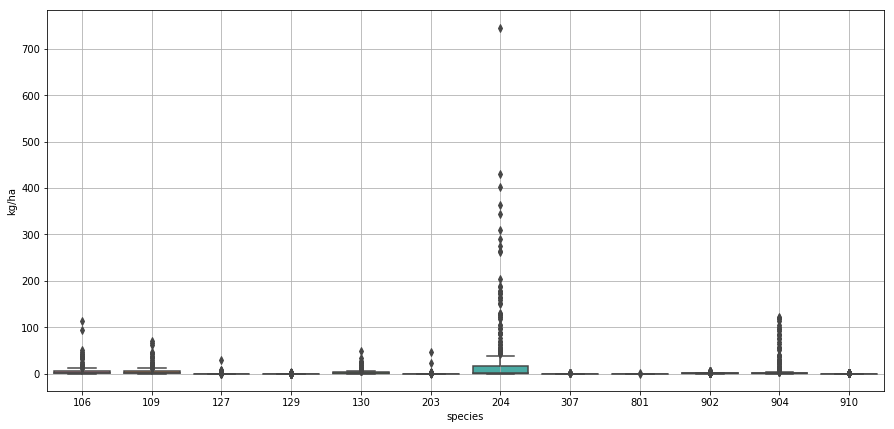

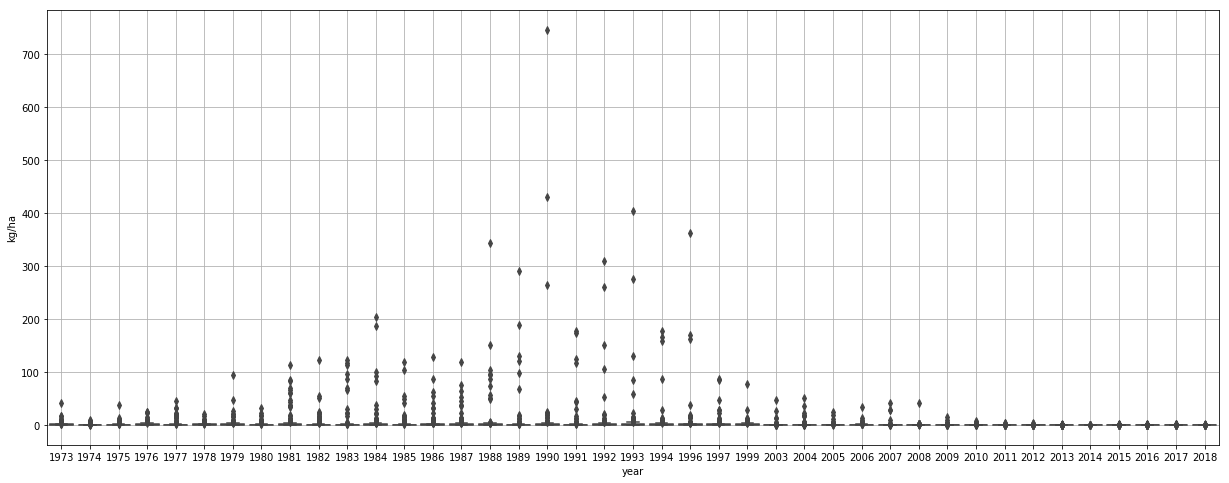

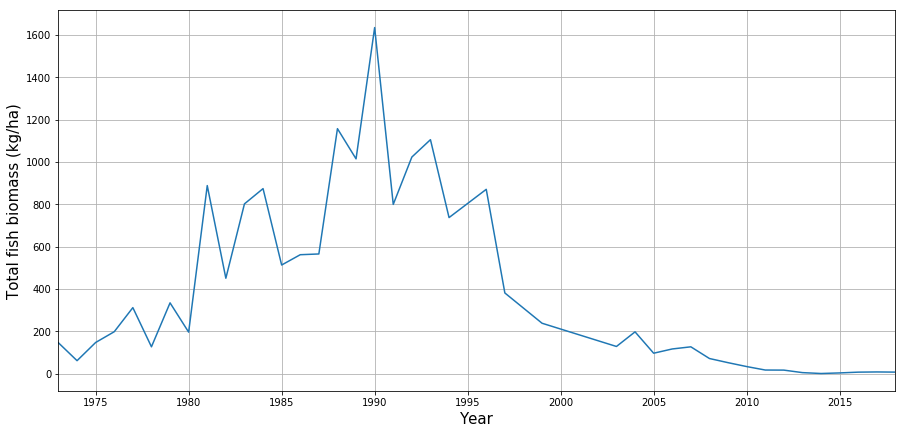

In [44]:
df_port_254_offshore = separate_port_wise(unique_ports[6], df = df_offshore)
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x = 'species', y = 'kg/ha', data = df_port_254_offshore, ax=ax)
plt.grid(True)
plt.show()

fig1, ax1 = plt.subplots(figsize=(21,8))
sns.boxplot(x = 'year', y = 'kg/ha', data = df_port_254_offshore, ax=ax1)
plt.grid(True)
plt.show()

total_biomass_port_254 = df_port_254_offshore.groupby('year')['kg/ha'].sum()

total_biomass_port_254.plot(figsize=(15,7))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)

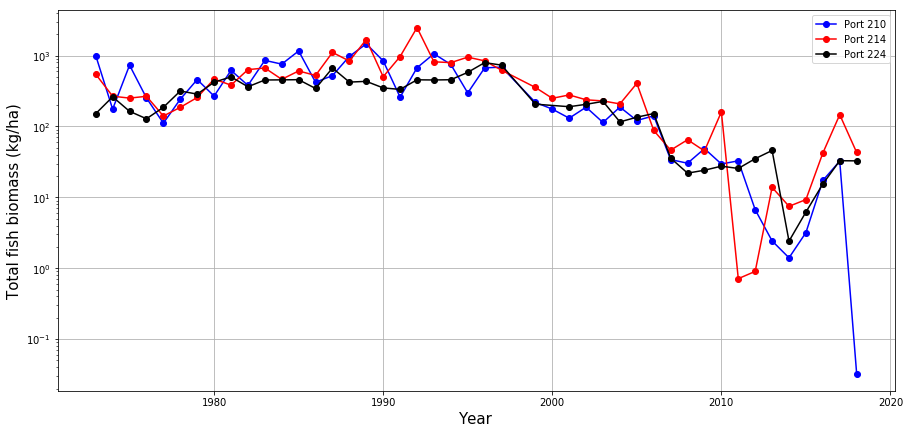

In [45]:
fig. ax0 = plt.subplots(figsize=(15,7))
plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 214')
plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
# plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 234')
# plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 240')
# plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
# plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)
plt.yscale('log')
plt.show()

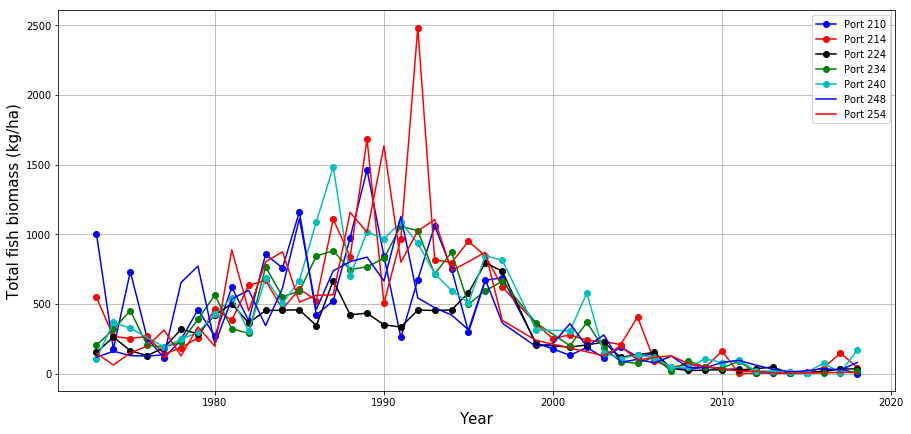

In [46]:
fig. ax0 = plt.subplots(figsize=(15,7))
plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 214')
plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 234')
plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 240')
plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)
# plt.yscale('log')
plt.show()

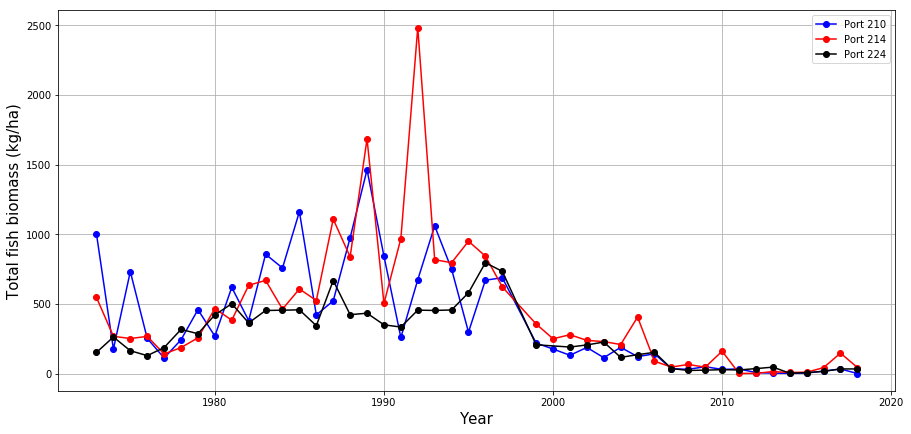

In [47]:
fig. ax0 = plt.subplots(figsize=(15,7))
plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 214')
plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
# plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 234')
# plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 240')
# plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
# plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)
# plt.yscale('log')
plt.show()

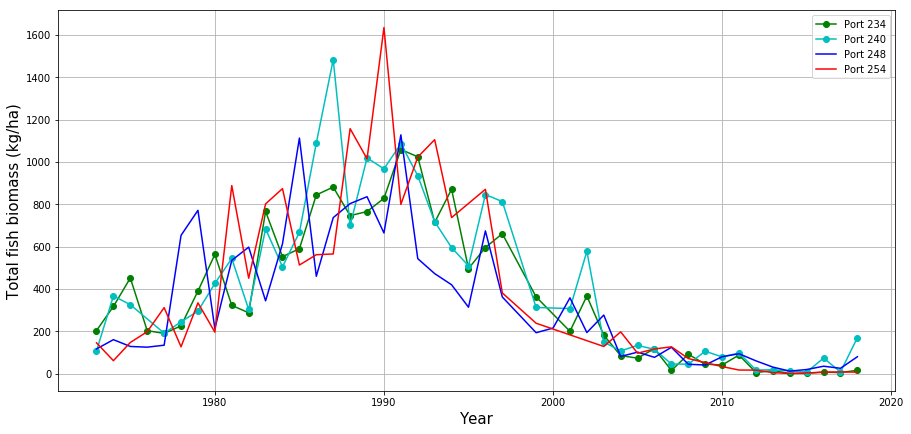

In [48]:
fig. ax0 = plt.subplots(figsize=(15,7))
# plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
# plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 254')
# plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 234')
plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 240')
plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)
# plt.yscale('log')
plt.show()

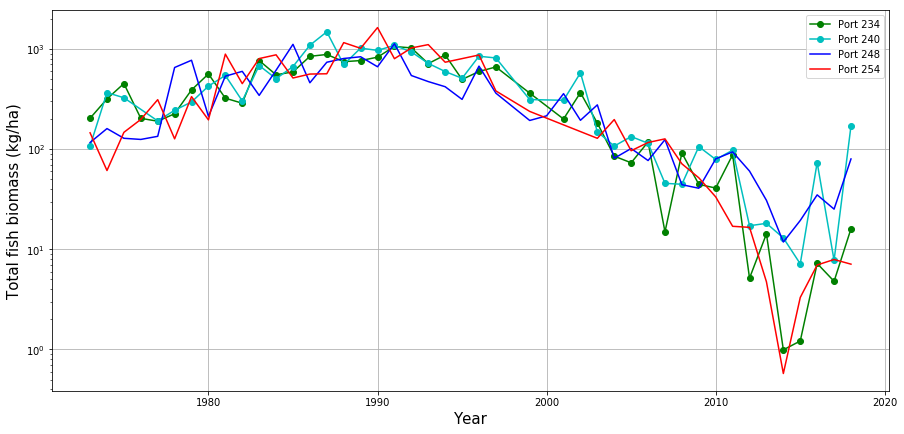

In [49]:
fig. ax0 = plt.subplots(figsize=(15,7))
# plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
# plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 254')
# plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 234')
plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 240')
plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)
plt.yscale('log')
plt.show()

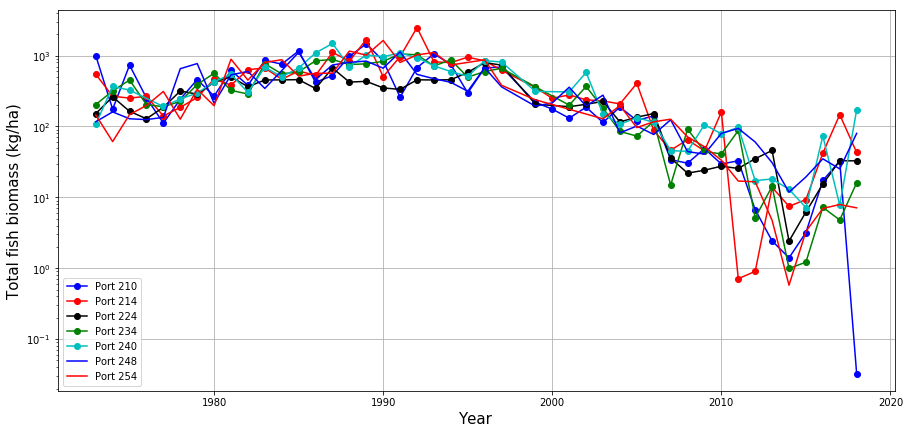

In [50]:
fig. ax0 = plt.subplots(figsize=(15,7))
plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 214')
plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 234')
plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 240')
plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)
plt.yscale('log')
plt.show()

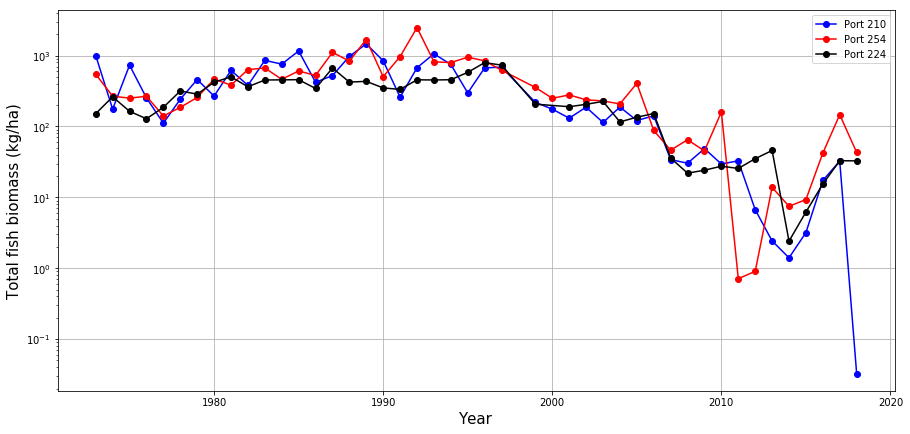

In [51]:
fig. ax0 = plt.subplots(figsize=(15,7))
plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 254')
plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
# plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 254')
# plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 254')
# plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
# plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)
plt.yscale('log')
plt.show()

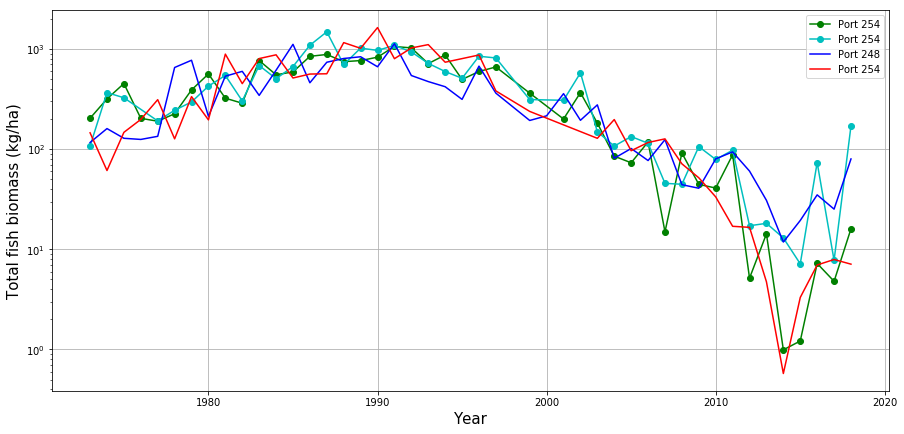

In [52]:
fig. ax0 = plt.subplots(figsize=(15,7))
# plt.plot(total_biomass_port_210.index, total_biomass_port_210, 'bo-', label='Port 210')
# plt.plot(total_biomass_port_214.index, total_biomass_port_214, 'ro-', label='Port 254')
# plt.plot(total_biomass_port_224.index, total_biomass_port_224, 'ko-' , label='Port 224')
plt.plot(total_biomass_port_234.index, total_biomass_port_234, 'go-', label='Port 254')
plt.plot(total_biomass_port_240.index, total_biomass_port_240, 'co-' , label='Port 254')
plt.plot(total_biomass_port_248.index, total_biomass_port_248, 'b-', label='Port 248')
plt.plot(total_biomass_port_254.index, total_biomass_port_254, 'r-' ,label='Port 254')
plt.legend()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total fish biomass (kg/ha)', fontsize= 15)
plt.grid(True)
plt.yscale('log')
plt.show()

In [53]:
df_port_wise = pd.DataFrame({'210':total_biomass_port_210, '214':total_biomass_port_214, '224':total_biomass_port_224, '234':total_biomass_port_234, 
                            '240':total_biomass_port_240, '248':total_biomass_port_248, '254':total_biomass_port_254})

In [54]:
df_port_wise.head(3)

,210,214,224,234,240,248,254
year,,,,,,,
1973,1000.59954,545.71847,151.47739,203.38982,107.35182,116.45309,145.55145
1974,175.51372,266.91201,261.97348,317.12268,366.73051,160.38104,61.15879
1975,731.61053,251.15635,163.54226,451.56881,325.75781,128.31355,147.07299


In [55]:
df_port_wise.describe()

,210,214,224,234,240,248,254
count,45.000000,45.000000,44.000000,44.000000,43.000000,45.000000,41.000000
mean,381.019099,442.203961,265.886847,369.559572,413.904426,334.574672,390.674420
std,378.919456,475.876195,212.688036,324.769651,373.703709,304.384037,416.421299
min,0.032690,0.712120,2.410060,0.992730,7.162880,11.819410,0.575900
25%,48.629020,140.435000,43.317370,82.041175,106.594245,81.086060,61.158790
50%,242.236610,266.912010,215.986355,302.215665,307.290100,212.563530,197.287100
75%,672.937970,621.705360,437.710085,611.881557,675.276195,542.939800,736.982200
max,1462.521460,2483.307310,795.437780,1058.352660,1482.938460,1127.549970,1634.258430


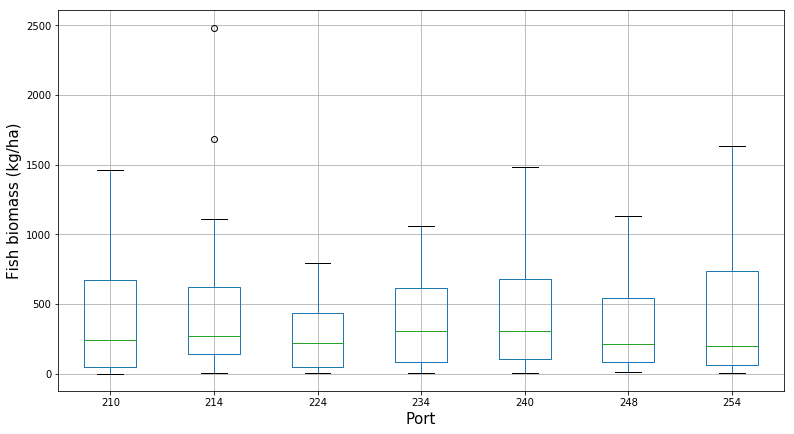

In [56]:
df_port_wise.boxplot(figsize=(13,7))
plt.xlabel('Port', fontsize=15)
plt.ylabel('Fish biomass (kg/ha)', fontsize=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


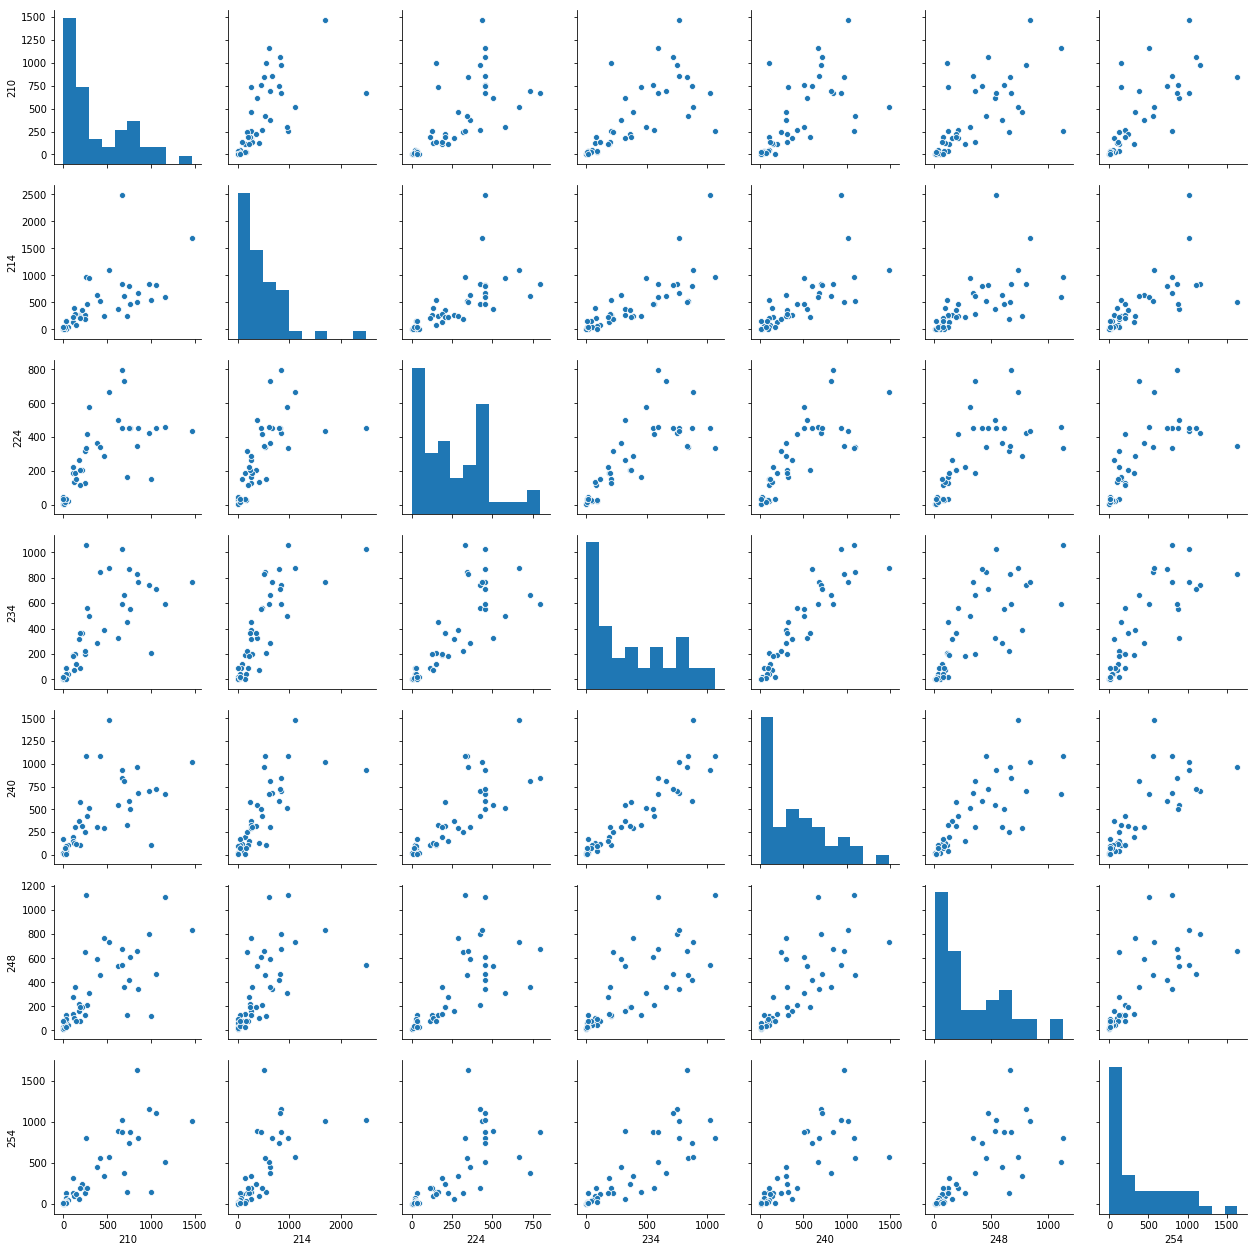

In [57]:
sns.pairplot(df_port_wise)
plt.show()

In [58]:
port_groupby = df_offshore.groupby(['port', 'year', 'Species Name'])

In [59]:
df_port_year_species = port_groupby['kg/ha'].sum().unstack()

In [60]:
df_port_year_species.head(7)

Species Name    Alewife    Bloater  Burbot  Deepwater sculpin  Lake trout  \
port year                                                                   
210  1973     838.89682  130.29810     0.0            4.55834     6.67748   
     1974      99.18322   16.04844     0.0           12.67833     0.54478   
     1975     596.44216   14.72832     0.0           44.73794     0.19355   
     1976     103.55472    4.15246     0.0           50.08519     1.20092   
     1977      56.71625    2.56801     0.0           26.49967     5.00398   
     1978      81.78564   78.27830     0.0           43.68985     3.45758   
     1979     154.62710  132.46418     0.0           75.67824     1.60814   

Species Name  Lake whitefish  Ninespine stickleback  Rainbow Smelt  \
port year                                                            
210  1973            0.00000                0.60045        8.50858   
     1974            0.00000                0.86162        9.63202   
     1975            0.00000                0.83731       17.38082   
     1976            0.00000                3.66994        9.01689   
     1977            0.06111                1.38892        2.98310   
     1978            0.96450                2.23802       21.10942   
     1979            0.38195                5.41393       62.71917   

Species Name  Round goby  Slimy sculpin  Threespine stickleback  Yellow perch  
port year                                                                      
210  1973            0.0       11.05977                     0.0       0.00000  
     1974            0.0       36.53612                     0.0       0.02919  
     1975            0.0       57.29043                     0.0       0.00000  
     1976            0.0       80.79089                     0.0       0.00000  
     1977            0.0       16.00715                     0.0       0.00000  
     1978            0.0       10.71330                     0.0       0.00000  
     1979            0.0       25.62623                     0.0       0.00000

In [61]:
df_port_year_species.tail(5)

Species Name  Alewife  Bloater   Burbot  Deepwater sculpin  Lake trout  \
port year                                                                
254  2014     0.00000  0.13263  0.00000            0.00758     0.00000   
     2015     0.15481  0.14867  2.55575            0.40880     0.00000   
     2016     0.00000  0.12436  0.00000            4.63738     0.00000   
     2017     0.02736  0.27380  0.00000            5.11110     0.10223   
     2018     0.49663  1.14451  0.00000            4.07740     0.05300   

Species Name  Lake whitefish  Ninespine stickleback  Rainbow Smelt  \
port year                                                            
254  2014                0.0                0.00000        0.04102   
     2015                0.0                0.00000        0.00053   
     2016                0.0                0.01625        0.17039   
     2017                0.0                0.02531        1.71323   
     2018                0.0                0.01031        0.58407   

Species Name  Round goby  Slimy sculpin  Threespine stickleback  Yellow perch  
port year                                                                      
254  2014        0.02490        0.36977                     0.0           0.0  
     2015        0.00852        0.02830                     0.0           0.0  
     2016        0.10970        1.91817                     0.0           0.0  
     2017        0.15460        0.50444                     0.0           0.0  
     2018        0.06500        0.67703                     0.0           0.0